In [7]:
#How many unique customers are in the dataset?
import pandas as pd

invoices = pd.read_csv("./fct_invoice.csv")

customers = pd.read_json("./dim_customer.json")

unique = customers["id"].nunique()
print("Unique customers: " + str(unique))

Unique customers: 5191


In [8]:
#What are the different categories of products available? How many unique categories are there?

categories = invoices["category"].unique()
print("Categories of products available: " + categories)
print("Unique categories: " + str(len(categories)))

['Categories of products available: Clothing'
 'Categories of products available: Shoes'
 'Categories of products available: Books'
 'Categories of products available: Cosmetics'
 'Categories of products available: Food & Beverage'
 'Categories of products available: Toys'
 'Categories of products available: Technology'
 'Categories of products available: Souvenir']
Unique categories: 8


In [9]:
#Which payment method is the most popular? How many times was it used?

payment = invoices["payment_method"].value_counts()
print("Most popular: " + payment.idxmax())
print("Times used: " + str(payment.max()))


Most popular: Cash
Times used: 44447


In [10]:
#What are the three most popular categories, by total sales?

categories = invoices["category"].value_counts()
print("Top 3 categories by sales: \n" + str(categories.nlargest(3)))

Top 3 categories by sales: 
category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Name: count, dtype: int64


In [11]:
#What are the total sales attributed to customers over the age of 45?
age = customers[customers["age"] > 45]
merged = invoices.merge(age, left_on = "customer_id", right_on = "id", how = "inner")
merged["sales"] = merged["quantity"] * merged["price"]
sales = merged["sales"].sum()
print("Total sales of customers over the age of 45: " + str(sales))

Total sales of customers over the age of 45: 82039768.15


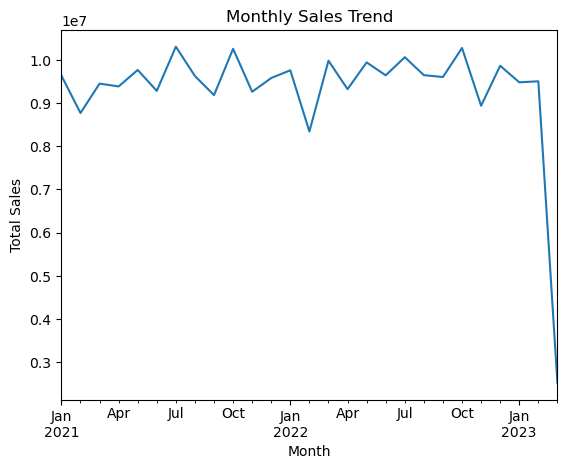

In [14]:
#   How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import matplotlib.pyplot as plt
import pandas as pd

invoices = pd.read_csv("./fct_invoice.csv")

invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"], dayfirst = True)
invoices["sales"] = invoices["quantity"] * invoices["price"]
sales = invoices.groupby(invoices["invoice_date"].dt.to_period("M"))["sales"].sum()
sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


In [3]:
# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

import pandas as pd

customers = pd.read_json("dim_customer.json")
invoices = pd.read_csv("fct_invoice.csv")

invoices["invoice_date"] = pd.to_datetime(invoices["invoice_date"], dayfirst = True)
invoices["sales"] = invoices["quantity"] * invoices["price"]

merged = invoices.merge(customers, left_on = "customer_id", right_on = "id", how = "inner")
merged = merged.dropna(subset=["age"])
merged["age_group"] = (merged["age"] // 10) * 10
merged["age_group"] = merged["age_group"].astype(str) + "-" + (merged["age_group"] + 9).astype(str)

pivot = pd.pivot_table(
    merged,
    values="sales",
    index="category",
    columns="age_group",
    aggfunc="sum",
    fill_value=0
)

print(pivot)


age_group         10.0-19.0    20.0-29.0    30.0-39.0    40.0-49.0  \
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

age_group          50.0-59.0    60.0-69.0   70.0-79.0   80.0-89.0  
category                                                           
Books               74962.20     80476.80    54827.85    26664.00  
Clothing         10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          587780.9